In [1]:
import numpy as np
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from collections.abc import Callable
from functools import wraps
import sys
from typing import Callable
%matplotlib ipympl

## Wyznaczanie Błędu

In [2]:
def maximum_error(A,B):
  n = len(A)
  return max([np.abs(A[i] - B[i]) for i in range(n)])

## Metoda Eulera

In [3]:
def euler_method(f, x0, y0, h, n):
  # f  -- function f(x, y)
  # x0 -- initial x value
  # y0 -- initial y value
  # h  -- step size
  # n  -- number of steps

  results = []
  x = x0
  y = y0

  results.append((x, y))

  for _ in range(n):
    y = y + h * f(x, y)
    x = x + h
    results.append((x, y))

  return results


## Metoda Rungego-Kuty

In [4]:
def runge_kutta_4(f, t0, y0, h, n_steps):
  # f       - function f(t, y)
  # t0      - initial time
  # y0      - initial value y(t0)
  # h       - step size
  # n_steps - number of steps to compute

  t = t0
  y = y0
  result = [(t, y)]

  for _ in range(n_steps):
    k1 = f(t, y)
    k2 = f(t + h / 2, y + h / 2 * k1)
    k3 = f(t + h / 2, y + h / 2 * k2)
    k4 = f(t + h, y + h * k3)

    y = y + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    t = t + h
    result.append((t, y))

  return result


## Wizualizacja

In [37]:

def plot_ode_solution(
  f_exact: Callable[[float], float],
  method_results: dict,
  x_range: tuple[float, float],
  parameter,
  title: str = 'Rozwiązanie równania różniczkowego',
  x_points: int = 1000
):
    # f_exact        -- dokładna funkcja rozwiązania (ciągła linia)
    # method_results -- słownik {"nazwa_metody": [(x0, y0), (x1, y1), ...]}
    # x_range        -- zakres wartości x jako (x_min, x_max)
    # title          -- tytuł wykresu
    # x_points       -- liczba punktów do wykreślenia funkcji dokładnej
  x_vals = np.linspace(x_range[0], x_range[1], x_points)

  # Wykres rozwiązania dokładnego
  plt.figure(figsize=(10, 6))
  plt.plot(x_vals, [f_exact(x) for x in x_vals], label="Dokładne rozwiązanie", color='black')

  # Wykresy aproksymacji
  for method_name, points in method_results.items():
    points = np.array(points)
    plt.plot(points[:, 0], points[:, 1], '--', label=f"{method_name}")

  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(title)
  plt.legend()
  plt.grid(True)
  plt.show()
  plt.savefig(f"data/ode_{parameter}.png")


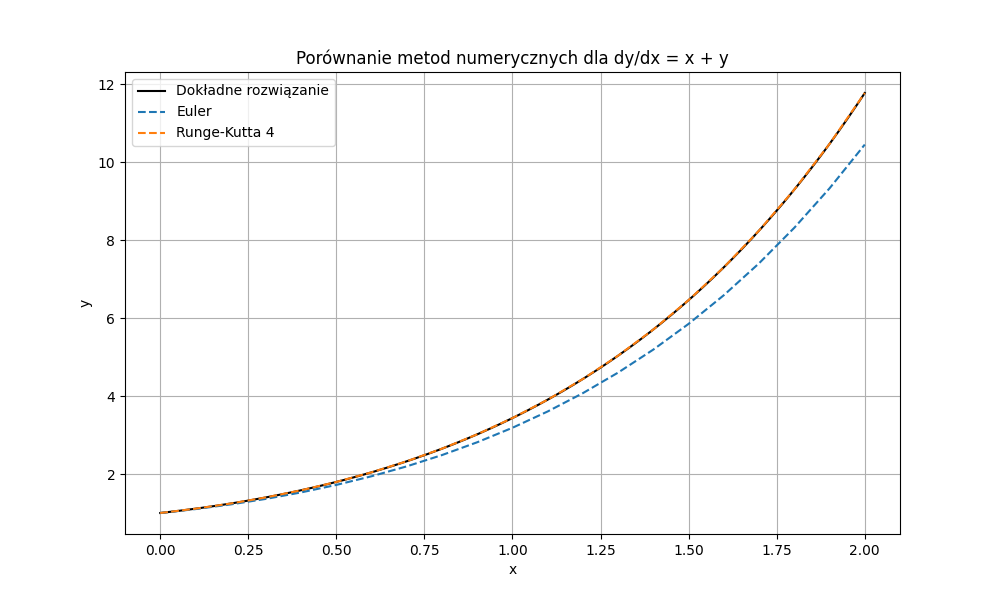

In [ ]:
# Równanie różniczkowe
f = lambda x, y: x + y

# Dokładne rozwiązanie
exact_solution = lambda x: 2 * np.exp(x) - x - 1

# Parametry
x0 = 0
y0 = 1
h = 0.1
n_steps = 20  # końcowy x = x0 + n_steps * h = 2

# Aproksymacje
euler = euler_method(f, x0, y0, h, n_steps)
rk4 = runge_kutta_4(f, x0, y0, h, n_steps)

# Wykres
plot_ode_solution(
  f_exact=exact_solution,
  method_results={
    "Euler": euler,
    "Runge-Kutta 4": rk4
  },
  parameter=h,
  x_range=(x0, x0 + h * n_steps),
  title="Porównanie metod numerycznych dla dy/dx = x + y"
)


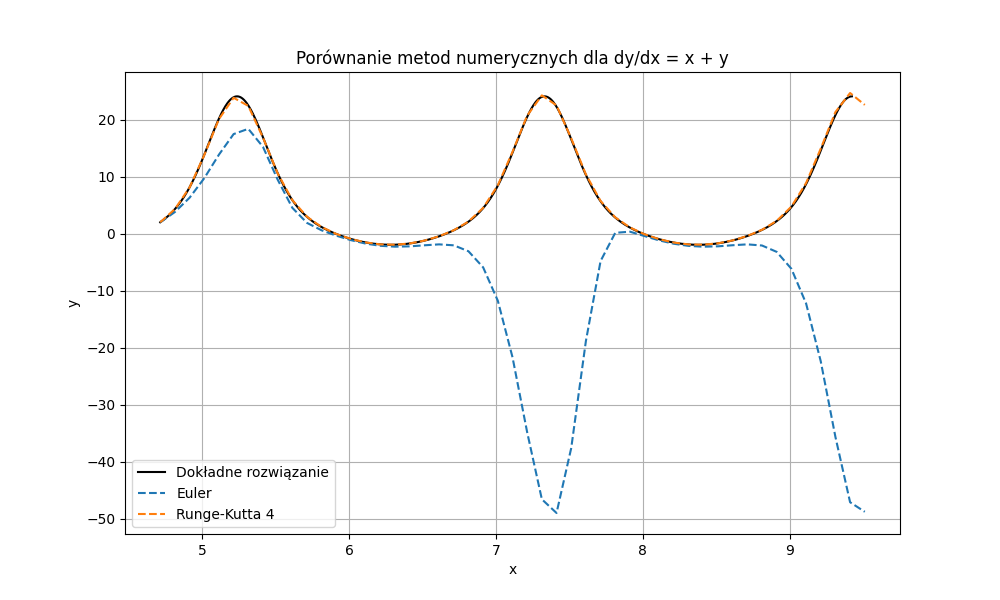

In [ ]:
k,m = 3,3 

eq = lambda x,y: k**2 * m * np.sin(m * x) * np.cos(m * x) + k * m * y* np.sin(m*x)

eq_exact = lambda x: np.exp(-k * np.cos(m *x)) - k * np.cos(m*x) + 1


# Parametry
x0 = 3 * np.pi/2
xk = 3 * np.pi
y0 = eq_exact(x0)
h = 0.1
n_steps = int((xk-x0 ) / h ) + 1

# Aproksymacje
euler = euler_method(eq, x0, y0, h, n_steps)
rk4 = runge_kutta_4(eq, x0, y0, h, n_steps)

# Wykres
plot_ode_solution(
  f_exact=eq_exact,
  method_results={
    "Euler": euler,
    "Runge-Kutta 4": rk4
  },
  parameter=h,
  x_range=(x0, xk),
  title="Porównanie metod numerycznych dla dy/dx = x + y"
)


In [40]:
import pandas as pd

STEP = [0.1, 0.01, 0.001, 0.0001, 0.00001]
errors = []

for step in STEP:
  # Parametry
  x0 = 3 * np.pi/2
  xk = 3 * np.pi
  y0 = eq_exact(x0)
  h = step
  n_steps = int((xk-x0 ) / h ) + 1

  # Aproksymacje
  euler = euler_method(eq, x0, y0, h, n_steps)
  rk4 = runge_kutta_4(eq, x0, y0, h, n_steps)

  # Obliczanie błędu
  euler_x, euler_y = zip(*euler)
  rk4_x, rk4_y = zip(*rk4)
  exact_euler = [eq_exact(x) for x in euler_x]
  exact_rk4 = [eq_exact(x) for x in rk4_x]
  euler_err = maximum_error(exact_euler, euler_y)
  rk4_err = maximum_error(exact_rk4, rk4_y)
  errors.append((step, euler_err, rk4_err))

  # plot_ode_solution(
  #   f_exact=eq_exact,
  #   method_results={
  #     "Euler": euler,
  #     "Runge-Kutta 4": rk4
  #   },
  #   x_range=(x0, xk),
  #   parameter=step,
  #   title="Porównanie metod numerycznych dla dy/dx = x + y"
  # )

# Wyświetlenie błędów
for step, euler_err, rk4_err in errors:
  print(f"h={step:.5e} | Euler error: {euler_err:.5e} | RK4 error: {rk4_err:.5e}")

df_errors = pd.DataFrame(errors, columns=["step", "euler_error", "rk4_error"])
df_errors.to_csv("ode_errors.csv", index=False, float_format="%.5e")

h=1.00000e-01 | Euler error: 7.12471e+01 | RK4 error: 6.29009e-01
h=1.00000e-02 | Euler error: 4.22640e+01 | RK4 error: 1.60143e-05
h=1.00000e-03 | Euler error: 6.04019e+00 | RK4 error: 1.71420e-09
h=1.00000e-04 | Euler error: 6.27823e-01 | RK4 error: 1.84816e-10
h=1.00000e-05 | Euler error: 6.30274e-02 | RK4 error: 3.00399e-09


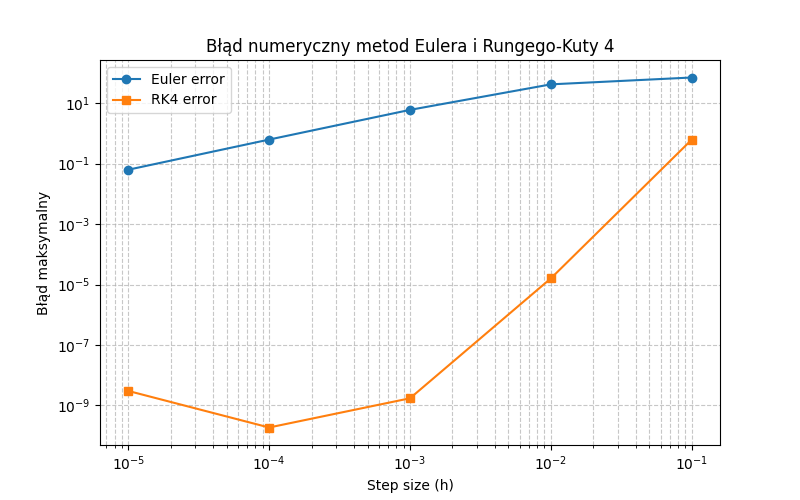

In [ ]:
plt.figure(figsize=(8, 5))
plt.loglog(df_errors['step'], df_errors['euler_error'], marker='o', label='Euler error')
plt.loglog(df_errors['step'], df_errors['rk4_error'], marker='s', label='RK4 error')
plt.xlabel('Rozmiar kroku (h)')
plt.ylabel('Błąd maksymalny')
plt.title('Błąd numeryczny metod Eulera i Rungego-Kuty 4')
plt.grid(True, which='both', ls='--', alpha=0.7)
plt.legend()
plt.show()